Gaser zaghloul

In [130]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

read data


In [131]:
df=pd.read_csv("data.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [132]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [133]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [134]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [135]:
df.shape[1] 

12

Missing data?

In [136]:
df.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

NO 

cat column

In [137]:
df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Outliers


In [138]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

visualization for outliers 

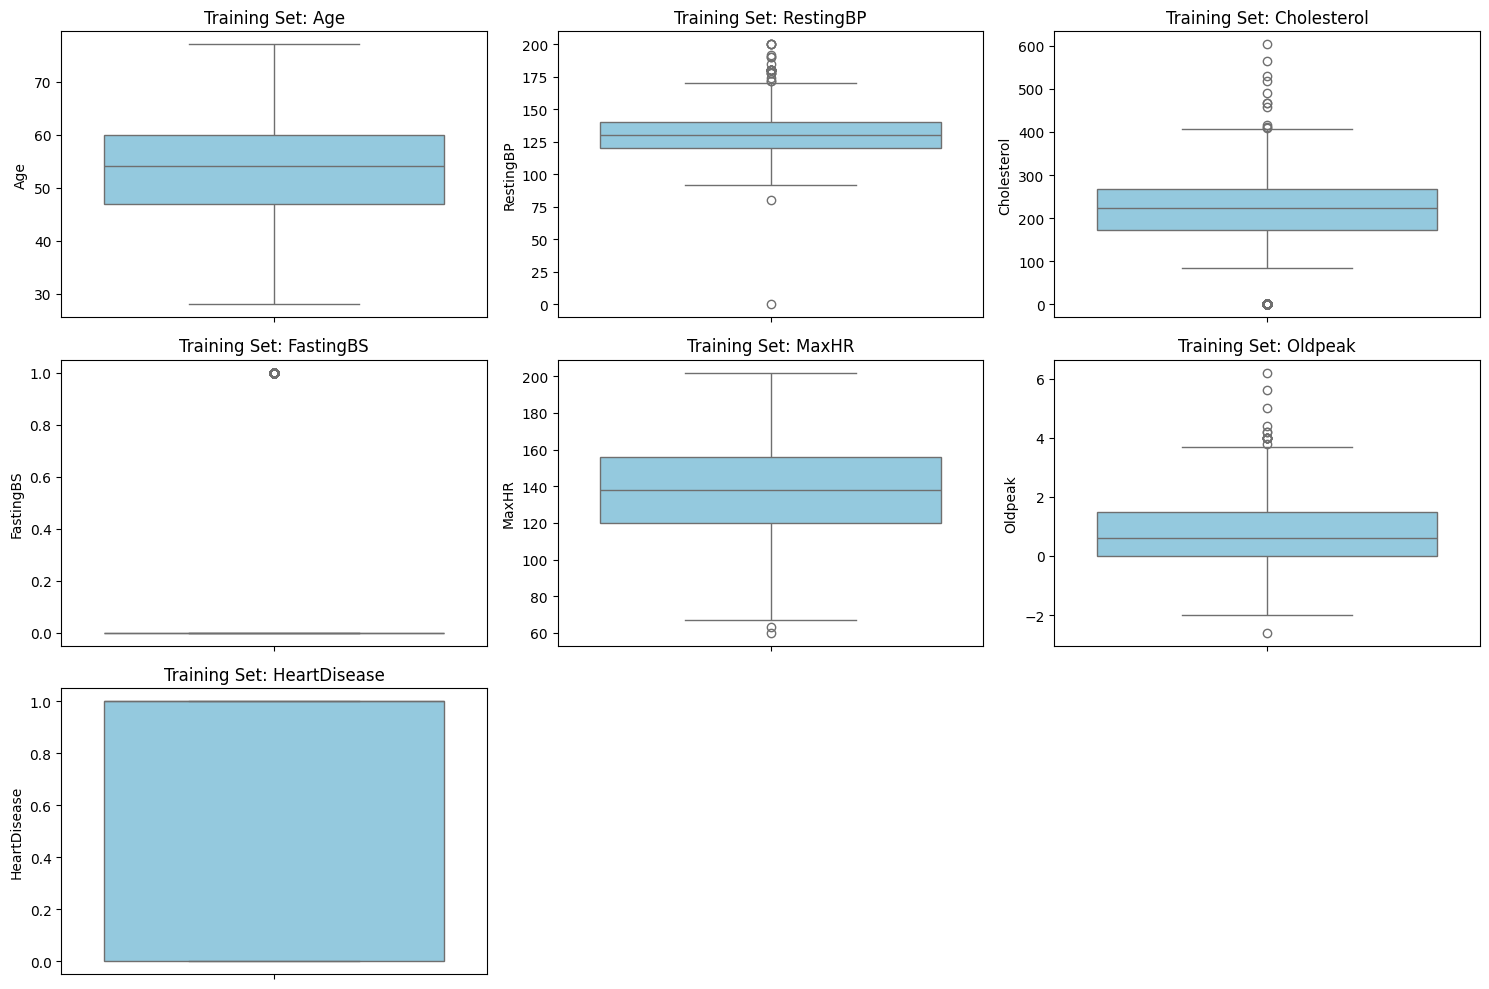

In [139]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Training Set: {col}')
plt.tight_layout()
plt.show()

In [140]:
z_score = numeric_columns.copy()

In [141]:
def detect_outliers_zscore(original_df, column_name):
    # Create a copy of the DataFrame for outlier detection
    temp_df = original_df[[column_name]].copy()
    
    # Calculate Z-scores
    temp_df['z_score'] = (temp_df[column_name] - temp_df[column_name].mean()) / temp_df[column_name].std()
    
    # Define outliers as data points with |Z-score| > 3
    outliers = temp_df[np.abs(temp_df['z_score']) > 3]
    
    # Plot the distribution and highlight outliers
    plt.figure(figsize=(10, 6))
    sns.histplot(original_df[column_name], bins=10, kde=True, color='blue', label='Data Distribution')
    plt.scatter(outliers[column_name], [0] * len(outliers), color='red', label='Outliers', s=100, zorder=3)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    # Return the full DataFrame with Z-scores and the outliers
    return temp_df, outliers

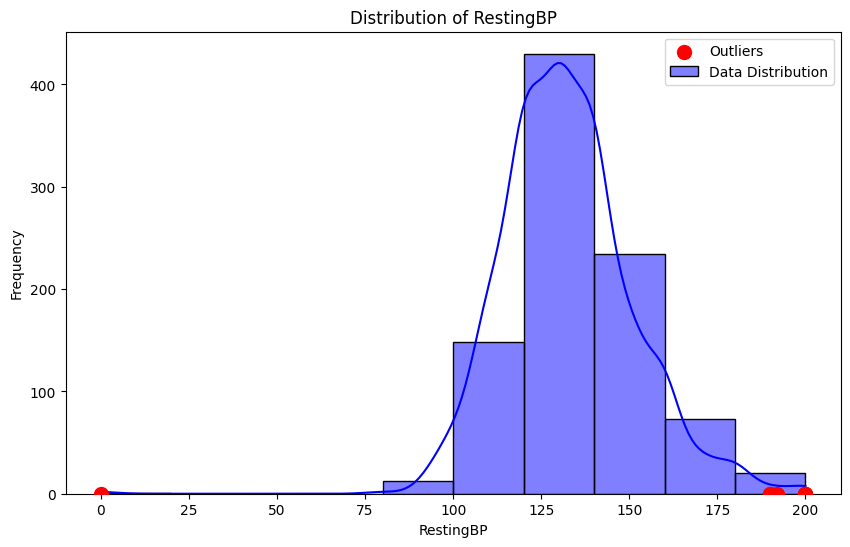

Detected Outliers:
8
     RestingBP   z_score
109        190  3.111322
241        200  3.651449
365        200  3.651449
399        200  3.651449
449          0 -7.151097
592        190  3.111322
732        200  3.651449
759        192  3.219347

DataFrame with Z-scores:
   RestingBP   z_score
0        140  0.410685
1        160  1.490940
2        130 -0.129442
3        138  0.302660
4        150  0.950812


In [142]:
z_score_df, outliers = detect_outliers_zscore(df, 'RestingBP')

# Print detected outliers
print("Detected Outliers:")
print(len(outliers))
print(outliers)

# Use z_score_df outside the function as needed
print("\nDataFrame with Z-scores:")
print(z_score_df.head())

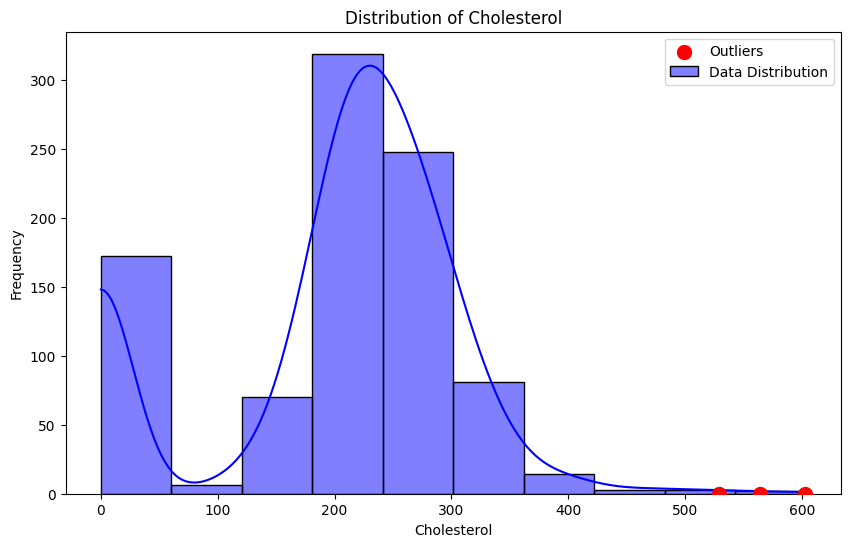

Detected Outliers:
3
     Cholesterol   z_score
76           529  3.018723
149          603  3.695238
616          564  3.338696

DataFrame with Z-scores:
   Cholesterol   z_score
0          289  0.824621
1          180 -0.171867
2          283  0.769768
3          214  0.138964
4          195 -0.034736
Detected Outliers:
3
     Cholesterol   z_score
76           529  3.018723
149          603  3.695238
616          564  3.338696


In [143]:
z_score_df, outliers = detect_outliers_zscore(df, 'Cholesterol')

# Print detected outliers
print("Detected Outliers:")
print(len(outliers))
print(outliers)

# Use z_score_df outside the function as needed
print("\nDataFrame with Z-scores:")
print(z_score_df.head())
# Print detected outliers
print("Detected Outliers:")
print(len(outliers))
print(outliers)

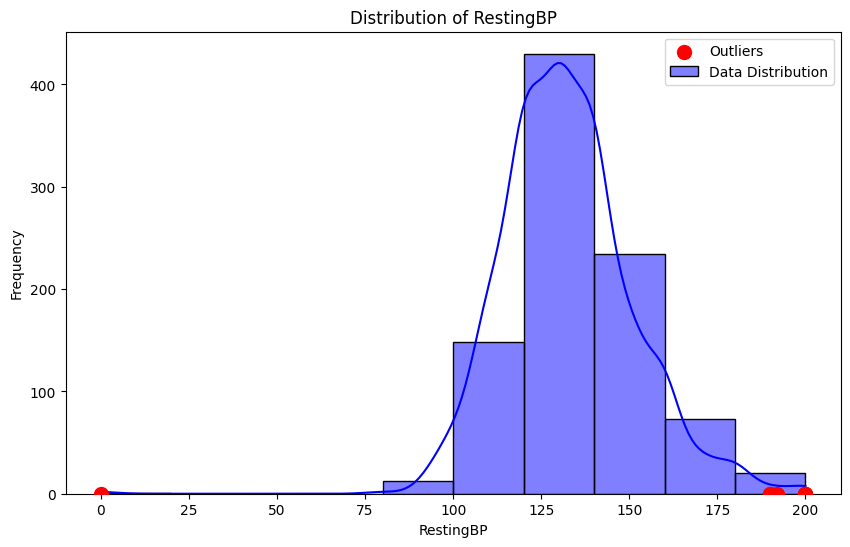

Detected Outliers:
8
     RestingBP   z_score
109        190  3.111322
241        200  3.651449
365        200  3.651449
399        200  3.651449
449          0 -7.151097
592        190  3.111322
732        200  3.651449
759        192  3.219347

DataFrame with Z-scores:
   RestingBP   z_score
0        140  0.410685
1        160  1.490940
2        130 -0.129442
3        138  0.302660
4        150  0.950812
Detected Outliers:
8
     RestingBP   z_score
109        190  3.111322
241        200  3.651449
365        200  3.651449
399        200  3.651449
449          0 -7.151097
592        190  3.111322
732        200  3.651449
759        192  3.219347


In [144]:
z_score_df, outliers = detect_outliers_zscore(df, 'RestingBP')

# Print detected outliers
print("Detected Outliers:")
print(len(outliers))
print(outliers)

# Use z_score_df outside the function as needed
print("\nDataFrame with Z-scores:")
print(z_score_df.head())
# Print detected outliers
print("Detected Outliers:")
print(len(outliers))
print(outliers)

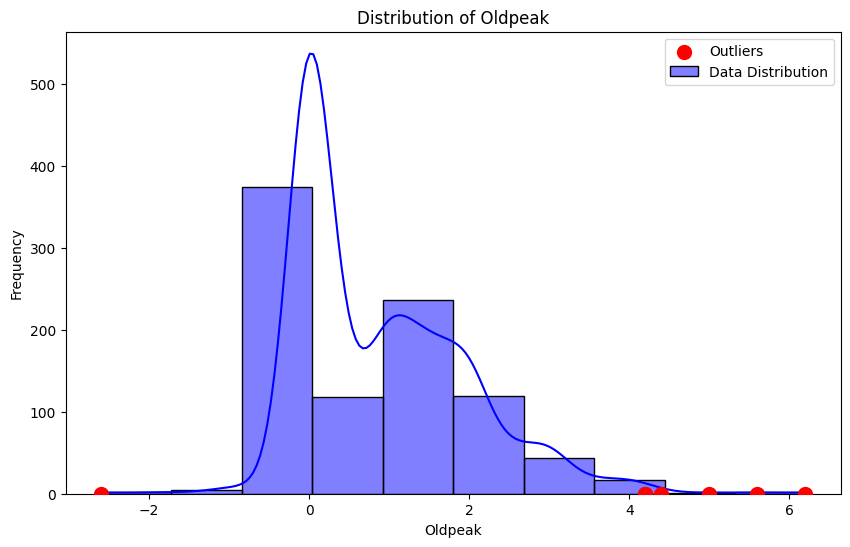

Detected Outliers:
7
     Oldpeak   z_score
166      5.0  3.855945
324     -2.6 -3.269699
702      4.2  3.105877
771      5.6  4.418496
791      4.2  3.105877
850      6.2  4.981047
900      4.4  3.293394

DataFrame with Z-scores:
   Oldpeak   z_score
0      0.0 -0.831979
1      1.0  0.105606
2      0.0 -0.831979
3      1.5  0.574398
4      0.0 -0.831979
Detected Outliers:
7
     Oldpeak   z_score
166      5.0  3.855945
324     -2.6 -3.269699
702      4.2  3.105877
771      5.6  4.418496
791      4.2  3.105877
850      6.2  4.981047
900      4.4  3.293394


In [145]:
z_score_df, outliers = detect_outliers_zscore(df, 'Oldpeak')

# Print detected outliers
print("Detected Outliers:")
print(len(outliers))
print(outliers)

# Use z_score_df outside the function as needed
print("\nDataFrame with Z-scores:")
print(z_score_df.head())
# Print detected outliers
print("Detected Outliers:")
print(len(outliers))
print(outliers)

remove outliers 

In [146]:
threshold = 1.5

# For RestingBP
Q1_bp = df['RestingBP'].quantile(0.25)
Q3_bp = df['RestingBP'].quantile(0.75)
IQR_bp = Q3_bp - Q1_bp

# For Cholesterol
Q1_chol = df['Cholesterol'].quantile(0.25)
Q3_chol = df['Cholesterol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol

# For MaxHR
Q1_hr = df['MaxHR'].quantile(0.25)
Q3_hr = df['MaxHR'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr

# For oldpeak
Q1_op = df['Oldpeak'].quantile(0.25)
Q3_op = df['Oldpeak'].quantile(0.75)
IQR_op = Q3_op - Q1_op

# Print the bounds for each feature
print("\nBounds for each feature:")
print(f"RestingBP: Lower = {Q1_bp - threshold * IQR_bp:.2f}, Upper = {Q3_bp + threshold * IQR_bp:.2f}")
print(f"Cholesterol: Lower = {Q1_chol - threshold * IQR_chol:.2f}, Upper = {Q3_chol + threshold * IQR_chol:.2f}")
print(f"MaxHR: Lower = {Q1_hr - threshold * IQR_hr:.2f}, Upper = {Q3_hr + threshold * IQR_hr:.2f}")
print(f"Oldpeak: Lower = {Q1_op - threshold * IQR_op:.2f}, Upper = {Q3_op + threshold * IQR_op:.2f}")


Bounds for each feature:
RestingBP: Lower = 90.00, Upper = 170.00
Cholesterol: Lower = 32.62, Upper = 407.62
MaxHR: Lower = 66.00, Upper = 210.00
Oldpeak: Lower = -2.25, Upper = 3.75


In [147]:
# Define thresholds for all features
lower_bound_bp = Q1_bp - threshold * IQR_bp
upper_bound_bp = Q3_bp + threshold * IQR_bp

lower_bound_chol = Q1_chol - threshold * IQR_chol
upper_bound_chol = Q3_chol + threshold * IQR_chol

lower_bound_hr = Q1_hr - threshold * IQR_hr
upper_bound_hr = Q3_hr + threshold * IQR_hr

lower_bound_op = Q1_op - threshold * IQR_op
upper_bound_op = Q3_op + threshold * IQR_op

# Filter out outliers for all features
df_cleaned = df[
    (df['RestingBP'] >= lower_bound_bp) & (df['RestingBP'] <= upper_bound_bp) &
    (df['Cholesterol'] >= lower_bound_chol) & (df['Cholesterol'] <= upper_bound_chol) &
    (df['MaxHR'] >= lower_bound_hr) & (df['MaxHR'] <= upper_bound_hr) &
    (df['Oldpeak'] >= lower_bound_op) & (df['Oldpeak'] <= upper_bound_op)
]

# Check the number of rows before and after dropping outliers
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

Original number of rows: 918
Number of rows after removing outliers: 702


Outliers have been removed and number of rows has decreased from 918 to  702.

duplicates

In [148]:
df_cleaned.duplicated().sum()

0

Data encoding and spliting 

In [149]:
dfe = pd.get_dummies(df_cleaned, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])


X = dfe.drop(columns=['HeartDisease'])
y = dfe['HeartDisease']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
dfe.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


PCA 

In [151]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y.reset_index(drop=True)


PCA visualization

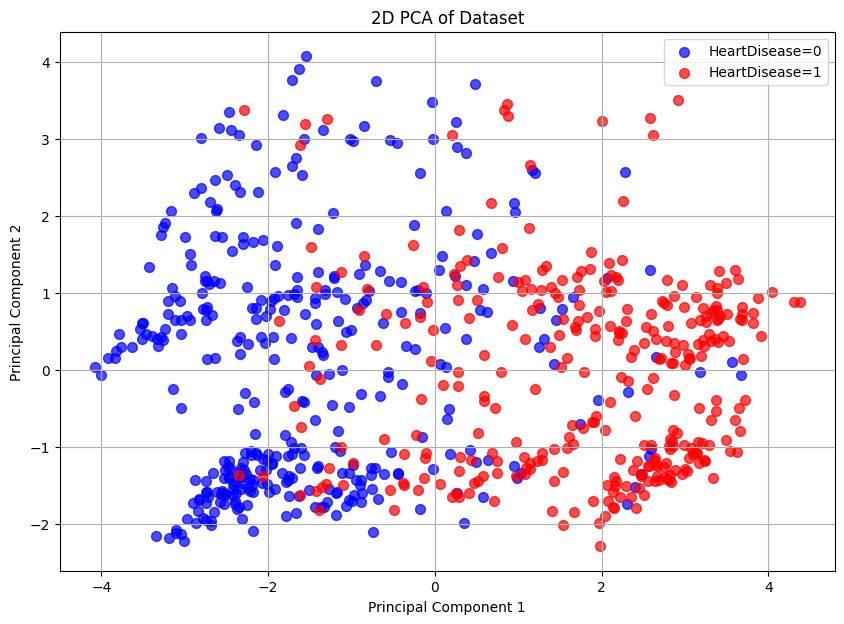

In [152]:
# Visualize the results
plt.figure(figsize=(10, 7))
for label, color in zip([0, 1], ['blue', 'red']):
    subset = pca_df[pca_df['HeartDisease'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'HeartDisease={label}', alpha=0.7, s=50, c=color)

plt.title('2D PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


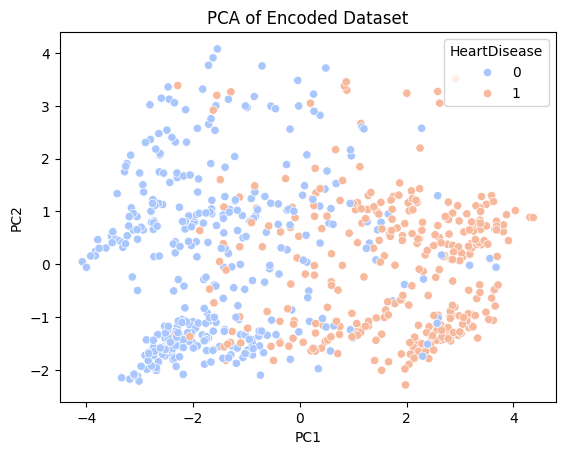

In [153]:
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm')
plt.title('PCA of Encoded Dataset')
plt.show()

data visualization to analyse and understand the data 

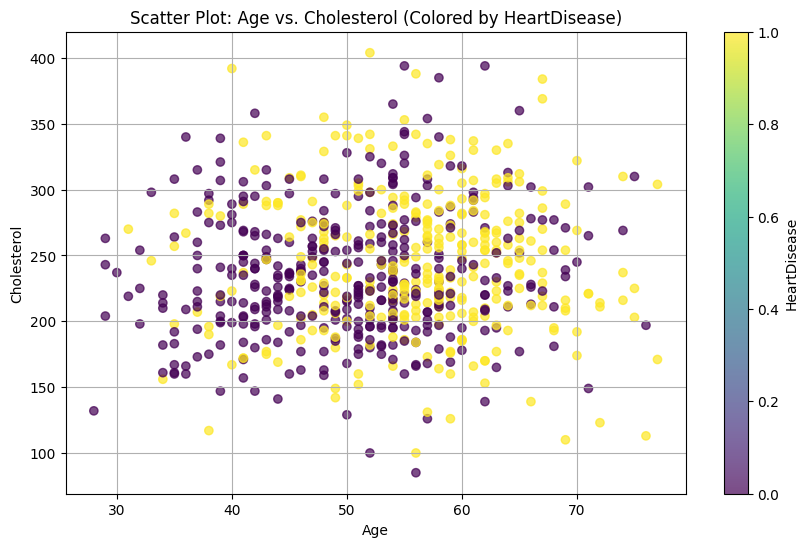

In [154]:
#between Age and Cholesterol
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['Cholesterol'], c=df_cleaned['HeartDisease'], cmap='viridis', alpha=0.7)
plt.colorbar(label='HeartDisease')
plt.title('Scatter Plot: Age vs. Cholesterol (Colored by HeartDisease)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

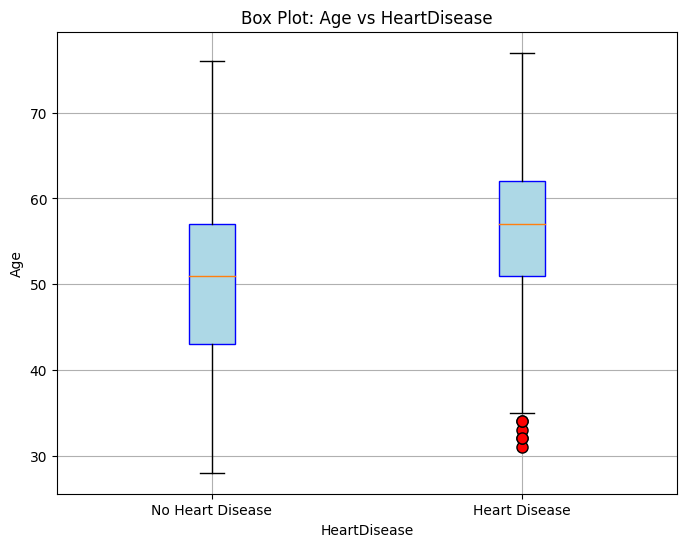

In [155]:
# Data preparation for Boxplot
heart_disease_0 = df[df['HeartDisease'] == 0]['Age']
heart_disease_1 = df[df['HeartDisease'] == 1]['Age']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([heart_disease_0, heart_disease_1], labels=['No Heart Disease', 'Heart Disease'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8, markeredgecolor='black'))
plt.title('Box Plot: Age vs HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.grid(True)
plt.show()

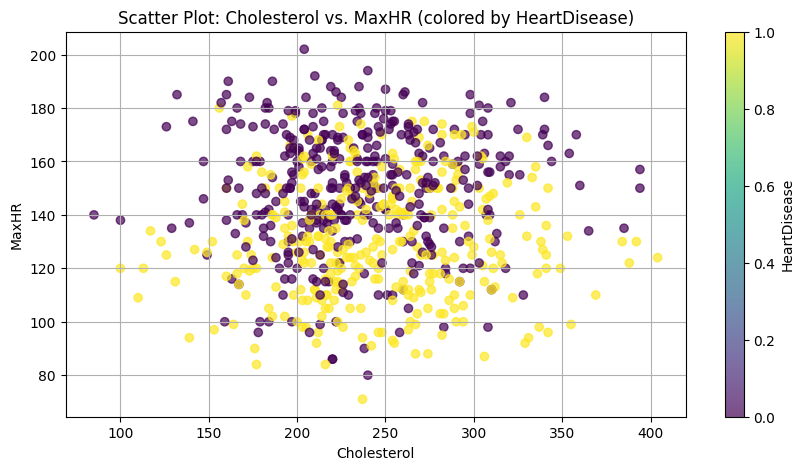

In [156]:
# between Cholesterol and MaxHR (numerical type)
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['Cholesterol'], df_cleaned['MaxHR'], c=df_cleaned['HeartDisease'], cmap='viridis', alpha=0.7)
plt.colorbar(label='HeartDisease')
plt.title('Scatter Plot: Cholesterol vs. MaxHR (colored by HeartDisease)')
plt.xlabel('Cholesterol')
plt.ylabel('MaxHR')
plt.grid(True)
plt.show()

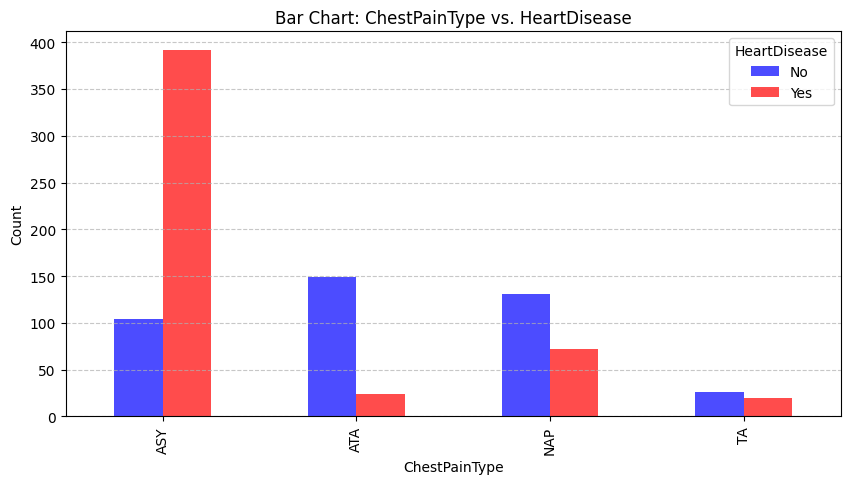

In [157]:

# Grouping and reshaping data
chest_pain_counts = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack()

# Creating a grouped bar chart
chest_pain_counts.plot(kind='bar', figsize=(10, 5), color=['blue', 'red'], alpha=0.7)

# Adding chart details
plt.title('Bar Chart: ChestPainType vs. HeartDisease')
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


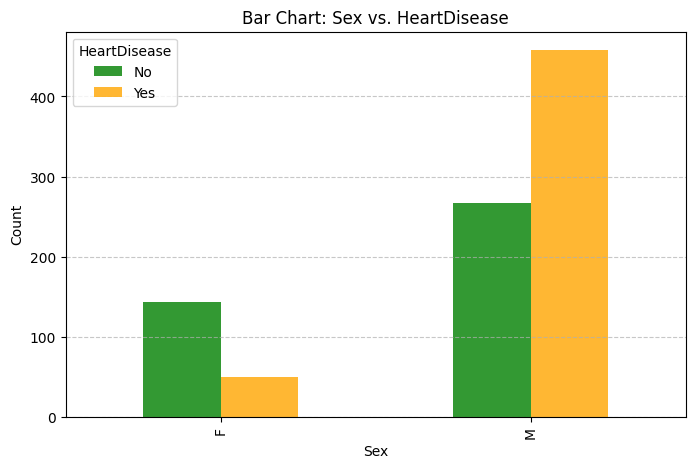

In [158]:
#  between Sex and HeartDisease (categorical type)
sex_counts = df.groupby(['Sex', 'HeartDisease']).size().unstack()
sex_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'orange'], alpha=0.8)
plt.title('Bar Chart: Sex vs. HeartDisease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



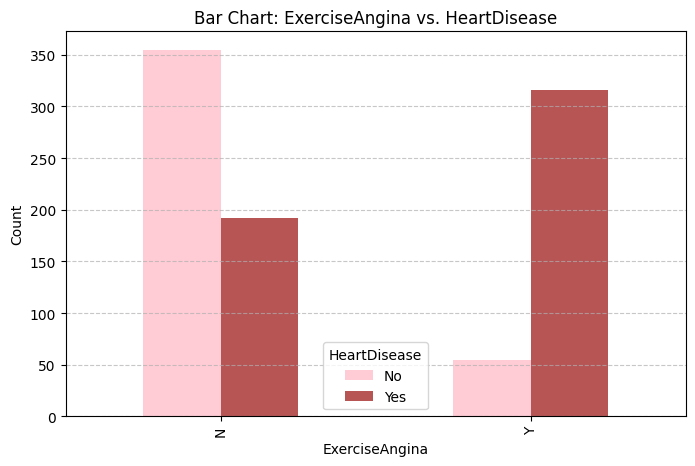

In [159]:
#  ExerciseAngina vs. HeartDisease (categorical type)
exercise_angina_counts = df.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack()
exercise_angina_counts.plot(kind='bar', figsize=(8, 5), color=['pink', 'brown'], alpha=0.8)
plt.title('Bar Chart: ExerciseAngina vs. HeartDisease')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

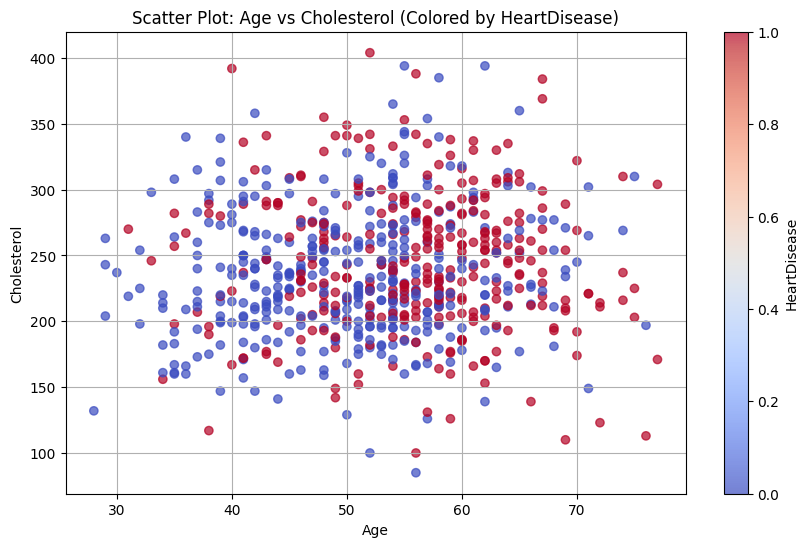

In [160]:
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for HeartDisease
plt.scatter(df_cleaned['Age'], df_cleaned['Cholesterol'], c=df_cleaned['HeartDisease'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='HeartDisease')
plt.title('Scatter Plot: Age vs Cholesterol (Colored by HeartDisease)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

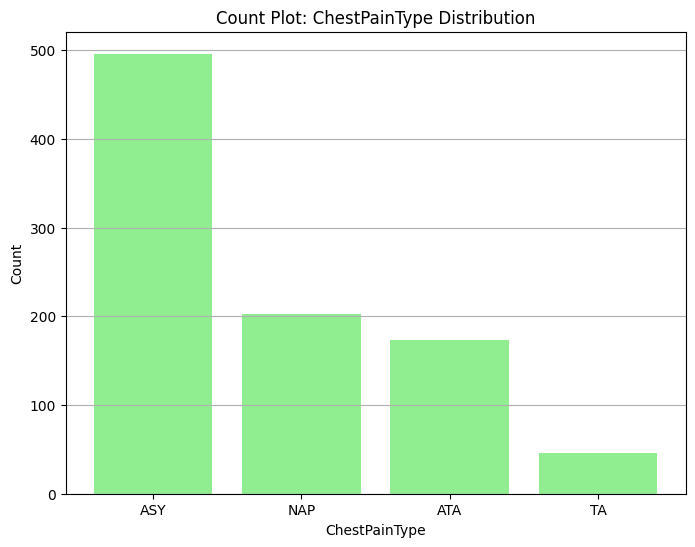

In [161]:
chest_pain_counts = df['ChestPainType'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(chest_pain_counts.index, chest_pain_counts.values, color='lightgreen')
plt.title('Count Plot: ChestPainType Distribution')
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

corr matrix 

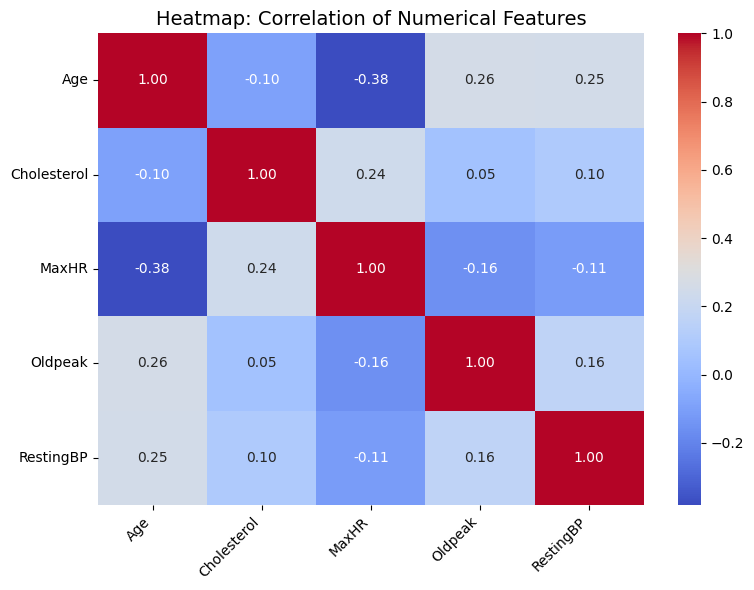

In [162]:
numerical_columns = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add labels and title
plt.title('Heatmap: Correlation of Numerical Features', fontsize=14)
plt.xticks(ticks=np.arange(len(corr_matrix.columns))+0.5, labels=corr_matrix.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(ticks=np.arange(len(corr_matrix.columns))+0.5, labels=corr_matrix.columns, rotation=0, fontsize=10)
plt.tight_layout()

plt.show()

In [163]:
X = dfe.drop(columns='HeartDisease')
y = dfe['HeartDisease']

split the data into 60% training data which it 421 row , and the rest is div into test and validation

In [164]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=40)
X_val ,X_test, y_val , y_test=train_test_split(X_temp, y_temp, test_size=0.7, random_state=40)


In [165]:
len(X_train)

421

In [166]:
len(X_temp)

281

In [167]:
len(X_test)

197

SVM


In [168]:
svm_model = SVC()


In [169]:
svm_model.fit(X_train, y_train,)

SVC()

In [170]:
svm_model.score(X_test, y_test)


0.6548223350253807

In [171]:
svm_model.score(X_val, y_val)

0.6666666666666666

In [172]:
svm_model.score(X_train, y_train)

0.7007125890736342

we need to improve the accuracy so we will try

In [173]:
svm_predect=svm_model.predict(X_test)
svm_predect

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

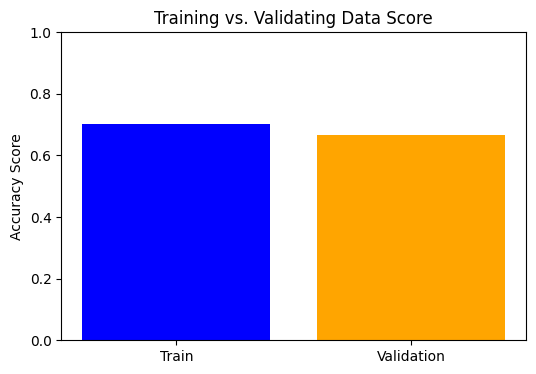

In [174]:
train_score = svm_model.score(X_train, y_train) 
val_score = svm_model.score(X_val, y_val) 

# Plotting the training and test scores
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_score, val_score], color=['blue', 'orange'])
plt.title('Training vs. Validating Data Score')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # 34an el accuracy ranges from 0 to 1
plt.show()


In [175]:
model_C = SVC(C=10) 
model_C.fit(X_train, y_train)
print(model_C.score(X_test, y_test))
print(model_C.score(X_train, y_train))

0.6852791878172588
0.7268408551068883


In [176]:
model_C = SVC(C=14) 
model_C.fit(X_train, y_train)
print(model_C.score(X_test, y_test))
print(model_C.score(X_train, y_train))

0.6802030456852792
0.7292161520190024


still the accuracy need to improve so we performed a grid search

In [177]:
param_grid = {
    'C': [0.1, 1, 10, 91, 100] ,
    'gamma': [0.01, 0.1, 1 ,'scale', 'auto'],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
    }

In [178]:
# grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1 , return_train_score=False)
# grid_search.fit(X_train, y_train)


Grid search code has been commented out since it takes a long time to run. However, after runnning it we concluded that the best accuracy was in C = 91 and in linear kernel.

In [179]:
# best_params_svm = grid_search.best_params_
# best_model_svm = grid_search.best_estimator_
best_model_svm=SVC(kernel='linear', C=91, gamma='scale')

In [180]:
best_model_svm.fit(X_train, y_train)

SVC(C=91, kernel='linear')

In [181]:
best_model_svm.score(X_train,y_train)

0.8693586698337292

In [182]:
best_model_svm.score(X_test,y_test)

0.8375634517766497

In [183]:
best_model_svm.score(X_val,y_val)

0.8333333333333334

In [184]:
y_pred = best_model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8375634517766497
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.82      0.84      0.83        92

    accuracy                           0.84       197
   macro avg       0.84      0.84      0.84       197
weighted avg       0.84      0.84      0.84       197



Save model accuracy to compare between them at the end

In [185]:
training_accuracies = {'Naive Bayes': [], 'Decision Tree': [], 'SVM': [], 'k-NN': []}
validation_accuracies = {'Naive Bayes': [], 'Decision Tree': [], 'SVM': [] , 'k-NN': []}
hyperparams = []
results = {}

Another method to find the best svm accuracy hyperparameter (faster than grid search)

In [186]:
best_svm_accuracy = 0
best_svm_params = ""
for kernel in ['linear', 'rbf', 'poly']:
    svm_model = SVC(kernel=kernel, random_state=40)
    svm_model.fit(X_train, y_train)
    
    train_acc = svm_model.score(X_train, y_train)
    val_acc = svm_model.score(X_test, y_test)
    
    training_accuracies['SVM'].append(train_acc)
    validation_accuracies['SVM'].append(val_acc)
    hyperparams.append(f"SVM({kernel})")
    
    if val_acc > best_svm_accuracy:
        best_svm_accuracy = val_acc
        best_svm_params = f"SVM(kernel={kernel})"


In [187]:
results['Best_SVM'] = {'Accuracy': best_model_svm}

In [188]:
best_svm_params

'SVM(kernel=linear)'

In [189]:
best_model_svm

SVC(C=91, kernel='linear')

function for confusion matrix 

In [190]:
def plot_confusion_matrix_percentage(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    
    # Normalize the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Display 
    print(f"Confusion Matrix for {model_name} (in Percentage):")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format=".2f")
    plt.title(f"{model_name} Confusion Matrix (Percentage)")
    plt.show()

SVM_confusion matrix

Confusion Matrix for SVM (in Percentage):


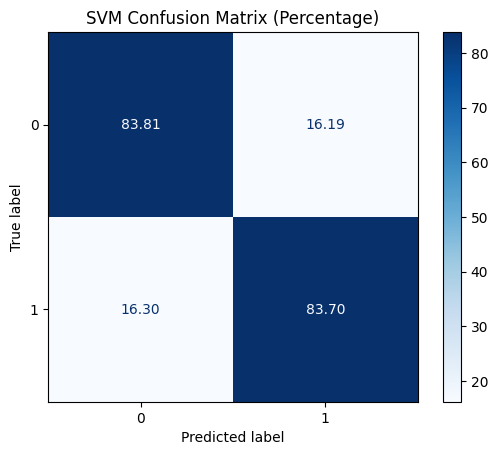

In [191]:
svm_cm=plot_confusion_matrix_percentage(best_model_svm, X_test, y_test, "SVM")
svm_cm

In [192]:
svm_predict=best_model_svm.predict(X_test)

In [193]:
precision = precision_score(y_test, svm_predict)
recall = recall_score(y_test, svm_predict)
f1 = f1_score(y_test, svm_predict)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


report = classification_report(y_test, svm_predect, target_names=["No HeartDisease", "HeartDisease"])
print(report)

Precision: 0.8191
Recall: 0.8370
F1-Score: 0.8280
                 precision    recall  f1-score   support

No HeartDisease       0.65      0.76      0.70       105
   HeartDisease       0.66      0.53      0.59        92

       accuracy                           0.65       197
      macro avg       0.66      0.65      0.65       197
   weighted avg       0.66      0.65      0.65       197



Bayes Model

In [194]:
nb_model = GaussianNB()

In [195]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [196]:
nb_model.score(X_test,y_test)

0.8527918781725888

In [197]:
nb_model.score(X_train,y_train)

0.8551068883610451

In [198]:
nb_model.score(X_val,y_val)

0.8333333333333334

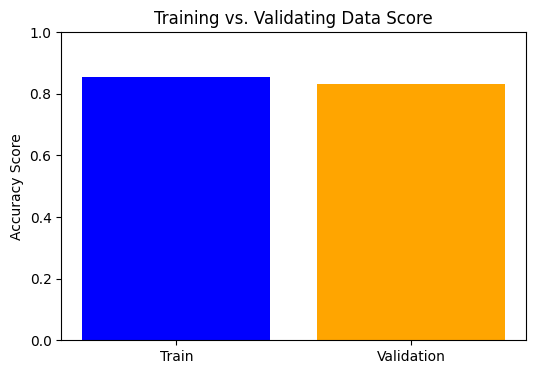

In [199]:
train_score = nb_model.score(X_train, y_train)
val_score = nb_model.score(X_val, y_val) 

# Plotting the training and test scores
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_score, val_score], color=['blue', 'orange'])
plt.title('Training vs. Validating Data Score')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

In [200]:
y_pred_bayes=nb_model.predict(X_test)
y_pred_bayes

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [201]:
training_accuracies['Naive Bayes'].append(train_acc)
validation_accuracies['Naive Bayes'].append(val_acc)
results['Best_Naive_Bayes'] = {'Accuracy': val_acc, 'Hyperparameters': 'GaussianNB()'}

Confusion Matrix for NB (in Percentage):


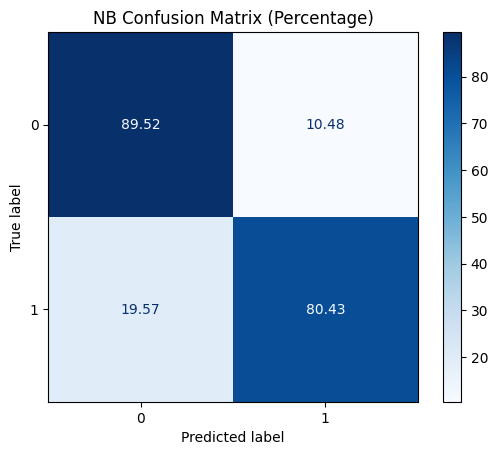

In [202]:
nb_model_best = GaussianNB()
nb_model_best.fit(X_train, y_train)
nb_cm=plot_confusion_matrix_percentage(nb_model_best, X_test, y_test, "NB")
nb_cm

In [203]:
bayes_predict=nb_model.predict(X_test) 

In [204]:
precision = precision_score(y_test, bayes_predict)
recall = recall_score(y_test, bayes_predict)
f1 = f1_score(y_test, bayes_predict)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


report = classification_report(y_test, bayes_predict, target_names=["No HeartDisease", "HeartDisease"])
print(report)

Precision: 0.8706
Recall: 0.8043
F1-Score: 0.8362
                 precision    recall  f1-score   support

No HeartDisease       0.84      0.90      0.87       105
   HeartDisease       0.87      0.80      0.84        92

       accuracy                           0.85       197
      macro avg       0.85      0.85      0.85       197
   weighted avg       0.85      0.85      0.85       197



Decision Tree Model

In [205]:
modelDT = DecisionTreeClassifier(criterion="entropy")

In [206]:
modelDT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

overfiting (expected)

In [207]:
train_acc = modelDT.score(X_train , y_train)
train_acc


1.0

In [208]:
val_acc =modelDT.score(X_val , y_val)
val_acc 

0.7857142857142857

In [209]:
test_acc =modelDT.score(X_test, y_test)
test_acc

0.8071065989847716

In [210]:
best_dt_accuracy = 0
best_dt_params = ""
for max_depth in [3, 5, 10, None]:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, y_train)
    
    train_acc = dt_model.score(X_train, y_train)
    val_acc = dt_model.score(X_test, y_test)
    
    training_accuracies['Decision Tree'].append(train_acc)
    validation_accuracies['Decision Tree'].append(val_acc)
    hyperparams.append(f"DecisionTree(max_depth={max_depth})")
    
    if val_acc > best_dt_accuracy:
        best_dt_accuracy = val_acc
        best_dt_params = f"DecisionTree(max_depth={max_depth})"

results['Best_Decision_Tree'] = {'Accuracy': best_dt_accuracy, 'Hyperparameters': best_dt_params}


In [211]:
best_dt_params

'DecisionTree(max_depth=3)'

In [212]:
best_dt_accuracy

0.8629441624365483

Decision tree confusion matrix 

Confusion Matrix for Decision Tree (in Percentage):


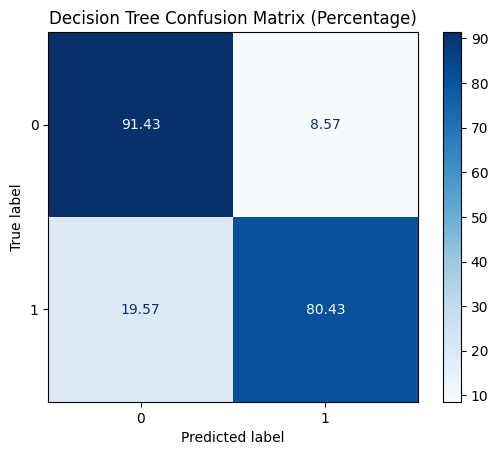

In [213]:
max_depth = int(results['Best_Decision_Tree']['Hyperparameters'].split('=')[-1][:-1]) if 'max_depth' in results['Best_Decision_Tree']['Hyperparameters'] else None
dt_model_best = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
dt_model_best.fit(X_train, y_train)
dt_cm=plot_confusion_matrix_percentage(dt_model_best, X_test, y_test, "Decision Tree")
dt_cm

In [214]:
dt_predict=dt_model_best.predict(X_test)

In [215]:
precision = precision_score(y_test, dt_predict)
recall = recall_score(y_test, dt_predict)
f1 = f1_score(y_test, dt_predict)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


report = classification_report(y_test, dt_predict, target_names=["No HeartDisease", "HeartDisease"])
print(report)

Precision: 0.8916
Recall: 0.8043
F1-Score: 0.8457
                 precision    recall  f1-score   support

No HeartDisease       0.84      0.91      0.88       105
   HeartDisease       0.89      0.80      0.85        92

       accuracy                           0.86       197
      macro avg       0.87      0.86      0.86       197
   weighted avg       0.87      0.86      0.86       197



KNN Model

In [216]:
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [217]:
y_pred_knn = knn_model.predict(X_test)

In [218]:
knn_model.score(X_train,y_train)

0.7885985748218527

In [219]:
knn_model.score(X_test,y_test)

0.6598984771573604

In [220]:
knn_model.score(X_val,y_val)

0.6309523809523809

In [221]:
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'metric': ['euclidean',  'minkowski'],
    'weights': ['uniform', 'distance','manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [5, 10, 15, 20, 25],
                         'weights': ['uniform', 'distance', 'manhattan']},
             scoring='accuracy', verbose=1)

In [222]:
best_params = grid_search.best_params_
best_knn_model=grid_search.best_estimator_

print("Best k-NN Parameters:", best_params)

Best k-NN Parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}


In [223]:
best_knn_model.score(X_test,y_test)

0.6852791878172588

In [224]:
best_knn_model.score(X_train,y_train)

1.0

In [225]:
best_knn_model.score(X_val,y_val)

0.6190476190476191

Grid search with this data led to overfitting, so i standardized the data before the grid search.

In [226]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()

data_standardized = dfe.copy()
data_standardized[numerical_columns] = scaler.fit_transform(dfe[numerical_columns])
data_standardized.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.335169,0.547914,0.973199,0,1.291925,-0.866393,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,-0.390639,1.845825,-1.178909,0,0.634669,0.176309,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,-1.650013,-0.101041,0.854735,0,-1.747885,-0.866393,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,-0.495587,0.418123,-0.507609,0,-1.337100,0.697660,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,0.134100,1.196870,-0.882748,0,-0.762001,-0.866393,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


now data is standardized and i need to split the data again, then apply KNN on the standardized data

In [227]:
X_s = data_standardized.drop(columns='HeartDisease')
y_s = data_standardized['HeartDisease']

In [228]:
X_train_s, X_temp_s, y_train_s, y_temp_s = train_test_split(X_s, y_s, test_size=0.4, random_state=40)
X_val_s ,X_test_s, y_val_s , y_test_s=train_test_split(X_temp_s, y_temp_s, test_size=0.7, random_state=40)


In [229]:
param_grid_s = {
    'n_neighbors': range(1, 20),
    'metric': ['euclidean',  'minkowski'],
    'weights': ['uniform', 'distance','manhattan']
}
knn_s = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [5, 10, 15, 20, 25],
                         'weights': ['uniform', 'distance', 'manhattan']},
             scoring='accuracy', verbose=1)

In [230]:
best_params_s = grid_search.best_params_
knn_model_s=grid_search.best_estimator_

print("Best k-NN Parameters:", best_params_s)

Best k-NN Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [231]:
knn_model_s = KNeighborsClassifier() 
knn_model_s.fit(X_train_s, y_train_s)

KNeighborsClassifier()

In [232]:
knn_model_s.score(X_train_s,y_train_s)

0.8978622327790974

In [233]:
knn_model_s.score(X_val_s,y_val_s)  

0.8452380952380952

In [234]:
knn_model_s.score(X_test_s,y_test_s) 

0.8324873096446701

No longer overfitted, accuracy has improved

Confusion Matrix for k-NN (in Percentage):


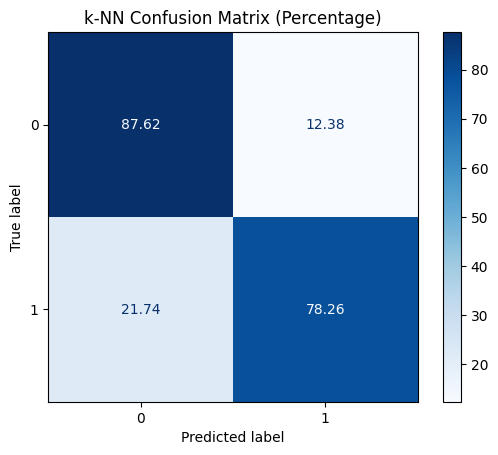

In [235]:
# n_neighbors = int(results['Best_k-NN']['Hyperparameters'].split('=')[-1][:-1])
knn_model_s = KNeighborsClassifier()
knn_model_s.fit(X_train_s, y_train_s)
knn_cm=plot_confusion_matrix_percentage(knn_model_s, X_test_s, y_test_s, "k-NN")
knn_cm

In [236]:
knn_predict=knn_model_s.predict(X_test_s)

In [237]:
precision = precision_score(y_test, knn_predict)
recall = recall_score(y_test, knn_predict)
f1 = f1_score(y_test, knn_predict) 

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


report = classification_report(y_test, knn_predict, target_names=["No HeartDisease", "HeartDisease"])
print(report)

Precision: 0.8471
Recall: 0.7826
F1-Score: 0.8136
                 precision    recall  f1-score   support

No HeartDisease       0.82      0.88      0.85       105
   HeartDisease       0.85      0.78      0.81        92

       accuracy                           0.83       197
      macro avg       0.83      0.83      0.83       197
   weighted avg       0.83      0.83      0.83       197



here we handle the outliers in Decision tree. Accuracy remained unchanged

In [238]:
modelDT_s=DecisionTreeClassifier(max_depth=3)

In [239]:
modelDT_s.fit(X_train_s,y_train_s)

DecisionTreeClassifier(max_depth=3)

In [240]:
modelDT_s.score(X_train_s,y_train)

0.8622327790973872

In [241]:
modelDT_s.score(X_test_s,y_test_s)

0.8629441624365483

In [242]:
modelDT_s.score(X_val_s,y_val_s)

0.8333333333333334

Model evaluation and comparision

looping on the 4 models and know the best model

Comparison of Model Accuracies:
           Model  Accuracy
0            SVM  0.837563
1    Naive Bayes  0.852792
2  Decision Tree  0.862944
3            KNN  0.832487


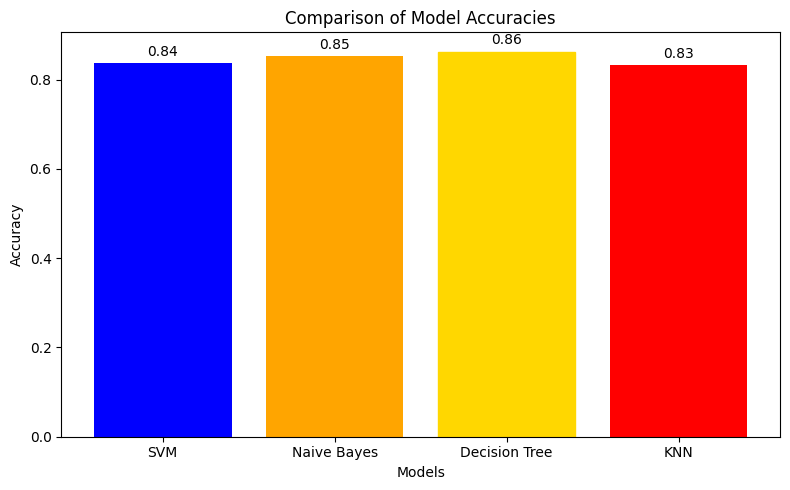

The best performing model in terms of accuracy is 'Decision Tree' with an accuracy of 0.86.


In [243]:
models = ['SVM', 'Naive Bayes', 'Decision Tree', 'KNN']
model_objects = [best_model_svm, nb_model, dt_model_best, knn_model_s]

# Initialize accuracy list
accuracies = []

for model_name, model in zip(models, model_objects):
    if model_name == 'KNN':
        # Predict using standardized test set for KNN
        y_pred = model.predict(X_test_s)
        acc = accuracy_score(y_test_s, y_pred)
    else:
        # Predict using non-standardized test set for other models
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
    
    # Append accuracy
    accuracies.append(acc)

# Display results in a table
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print("Comparison of Model Accuracies:")
print(results_df)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(models))
bars = ax.bar(x, accuracies, color=['blue', 'orange', 'green', 'red'])

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Highlight the best model
best_accuracy = max(accuracies)
best_model_index = accuracies.index(best_accuracy)
bars[best_model_index].set_color('gold')  # Highlight the best model

# Display 
plt.tight_layout()
plt.show()

best_model = models[best_model_index]
print(f"The best performing model in terms of accuracy is '{best_model}' with an accuracy of {best_accuracy:.2f}.")


compare Accuracy, Precision , Recall , F1 score

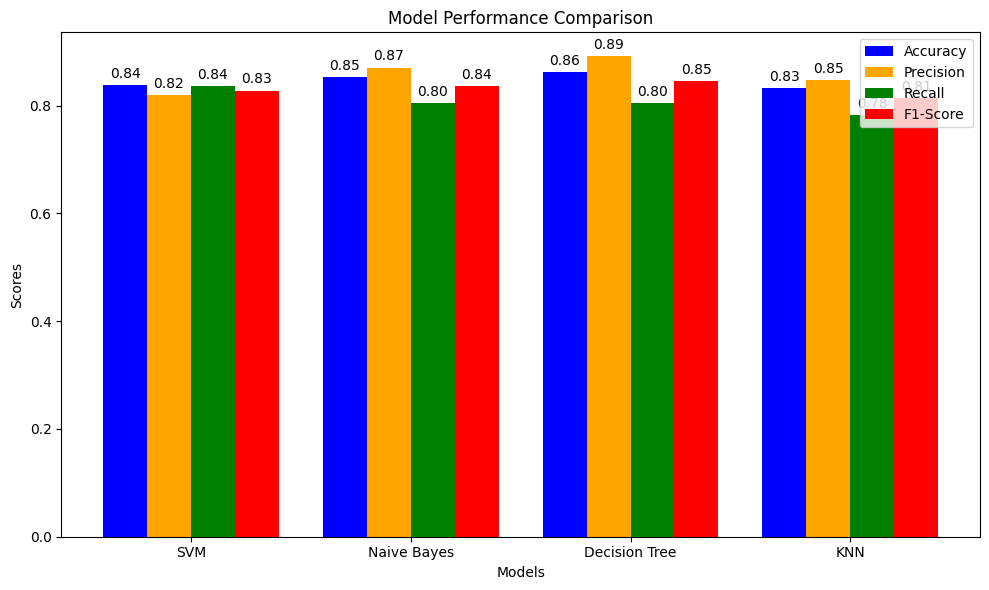

In [244]:
models = ['SVM', 'Naive Bayes', 'Decision Tree', 'KNN']
model_objects = [best_model_svm, nb_model_best, dt_model_best, knn_model_s] 

accuracies = []
precisions = []
recalls = []
f1_scores = []

for model_name, model in zip(models, model_objects):
    if model_name == 'KNN':  
        y_pred = model.predict(X_test_s)  # KNN uses standardized test set
        accuracies.append(accuracy_score(y_test_s, y_pred))
        precisions.append(precision_score(y_test_s, y_pred))
        recalls.append(recall_score(y_test_s, y_pred))
        f1_scores.append(f1_score(y_test_s, y_pred))
    else:
        y_pred = model.predict(X_test)  # Use standardized t est set for all models
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

x = np.arange(len(models)) 
width = 0.2  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5 * width, accuracies, width, label='Accuracy', color='blue')
rects2 = ax.bar(x - 0.5 * width, precisions, width, label='Precision', color='orange')
rects3 = ax.bar(x + 0.5 * width, recalls, width, label='Recall', color='green')
rects4 = ax.bar(x + 1.5 * width, f1_scores, width, label='F1-Score', color='red')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def add_annotations(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_annotations(rects1)
add_annotations(rects2)
add_annotations(rects3)
add_annotations(rects4)

plt.tight_layout()
plt.show()

best_accuracy = max(accuracies)
best_model = models[accuracies.index(best_accuracy)]

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

what if we didnt standardize the data in knn ???

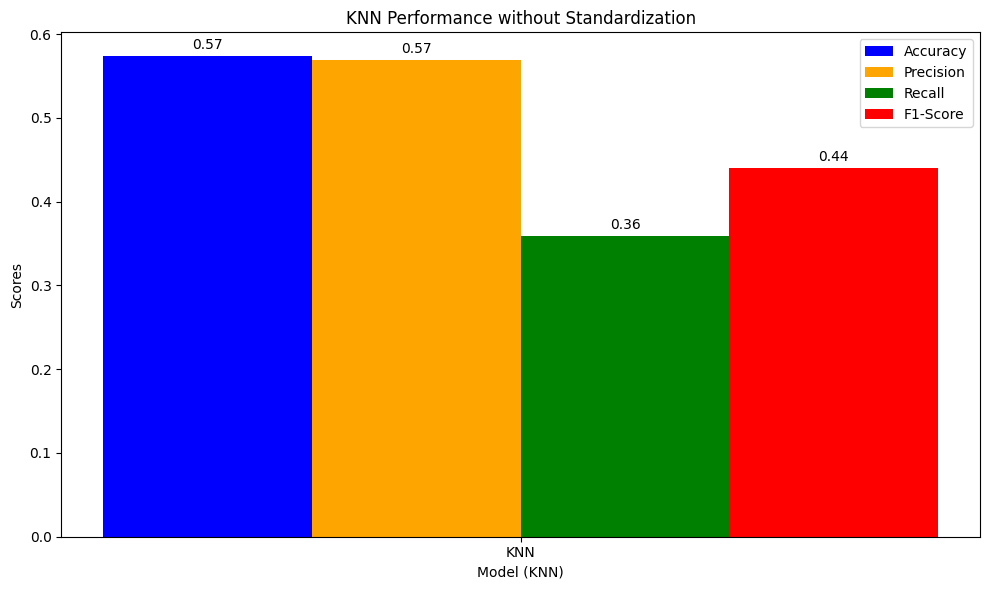

In [245]:
models = ['KNN']
accuracies = [accuracy_score(y_test, knn_model_s.predict(X_test))]
precisions = [precision_score(y_test, knn_model_s.predict(X_test))]
recalls = [recall_score(y_test, knn_model_s.predict(X_test))]
f1_scores = [f1_score(y_test, knn_model_s.predict(X_test))]

x = np.arange(len(models)) 
width = 0.1  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5 * width, accuracies, width, label='Accuracy', color='blue')
rects2 = ax.bar(x - 0.5 * width, precisions, width, label='Precision', color='orange')
rects3 = ax.bar(x + 0.5 * width, recalls, width, label='Recall', color='green')
rects4 = ax.bar(x + 1.5 * width, f1_scores, width, label='F1-Score', color='red')

ax.set_xlabel('Model (KNN)')
ax.set_ylabel('Scores')
ax.set_title('KNN Performance without Standardization')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def add_annotations(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_annotations(rects1)
add_annotations(rects2)
add_annotations(rects3)
add_annotations(rects4)

plt.tight_layout()
plt.show()


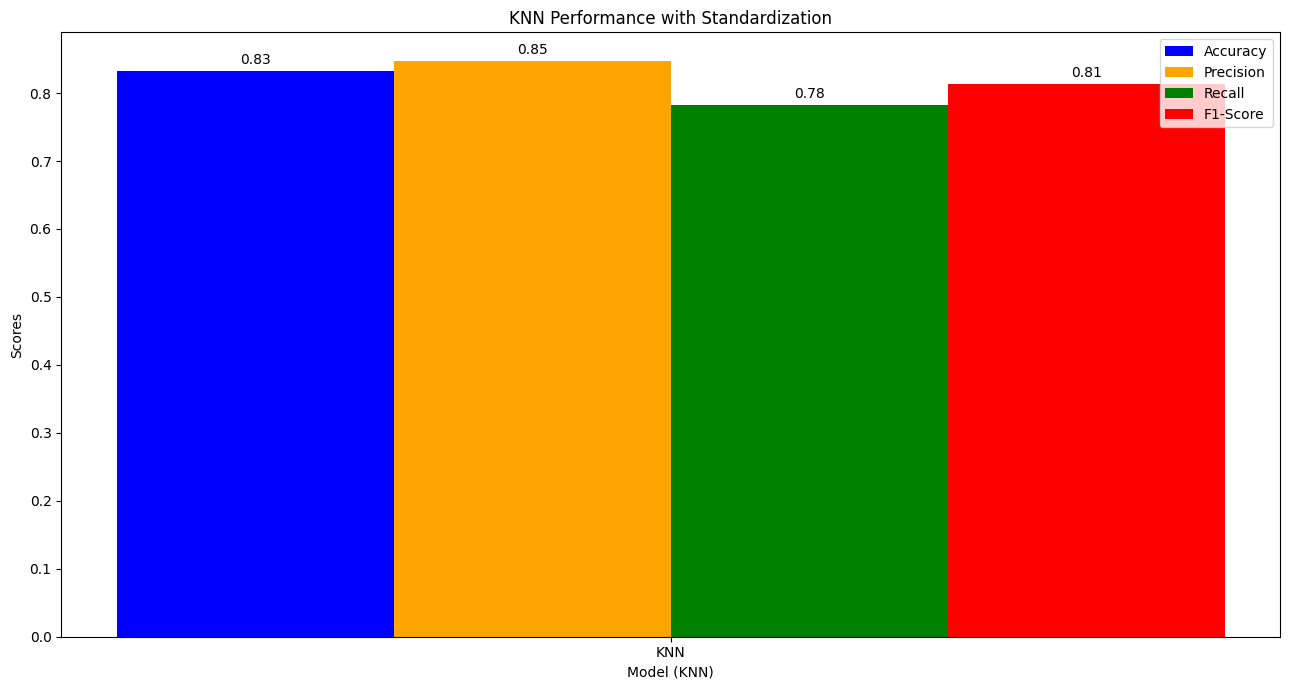

In [246]:
models = ['KNN']
accuracies = [accuracy_score(y_test_s, knn_model_s.predict(X_test_s))]
precisions = [precision_score(y_test_s, knn_model_s.predict(X_test_s))]
recalls = [recall_score(y_test_s, knn_model_s.predict(X_test_s))]
f1_scores = [f1_score(y_test_s, knn_model_s.predict(X_test_s))]


x = np.arange(len(models)) 
width = 0.1  # Bar width

fig, ax = plt.subplots(figsize=(13, 7))

rects1 = ax.bar(x - 1.5 * width, accuracies, width, label='Accuracy', color='blue')
rects2 = ax.bar(x - 0.5 * width, precisions, width, label='Precision', color='orange')
rects3 = ax.bar(x + 0.5 * width, recalls, width, label='Recall', color='green')
rects4 = ax.bar(x + 1.5 * width, f1_scores, width, label='F1-Score', color='red')

ax.set_xlabel('Model (KNN)')
ax.set_ylabel('Scores')
ax.set_title('KNN Performance with Standardization')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def add_annotations(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_annotations(rects1)
add_annotations(rects2)
add_annotations(rects3)
add_annotations(rects4)

plt.tight_layout()
plt.show()


In [247]:
results_standard = {}
results_minmax = {}

Hierarchical clustering Dendrogram


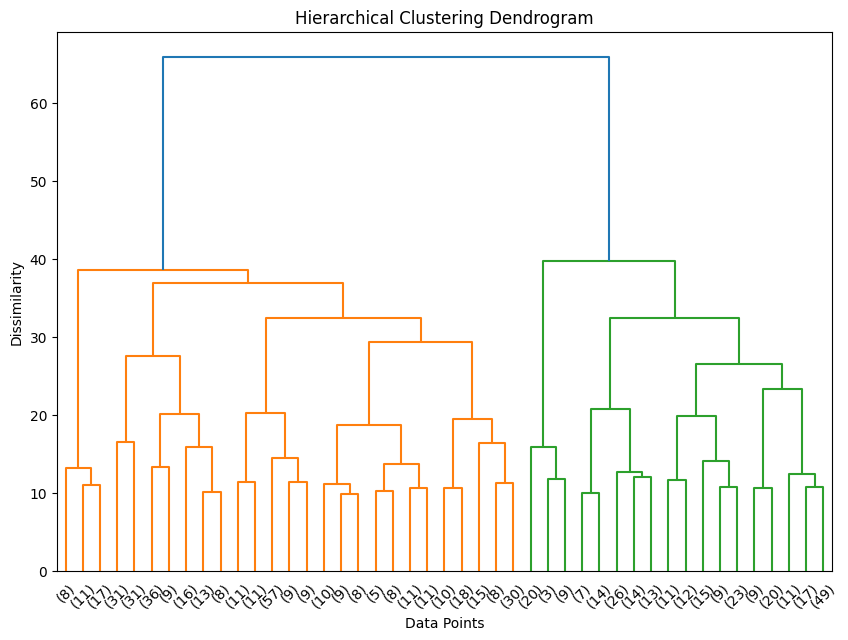

Optimal number of clusters: 3


In [248]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=45, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity')
plt.show()
optimal_clusters = fcluster(linked, t=3, criterion='maxclust') 
print(f"Optimal number of clusters: {len(set(optimal_clusters))}")

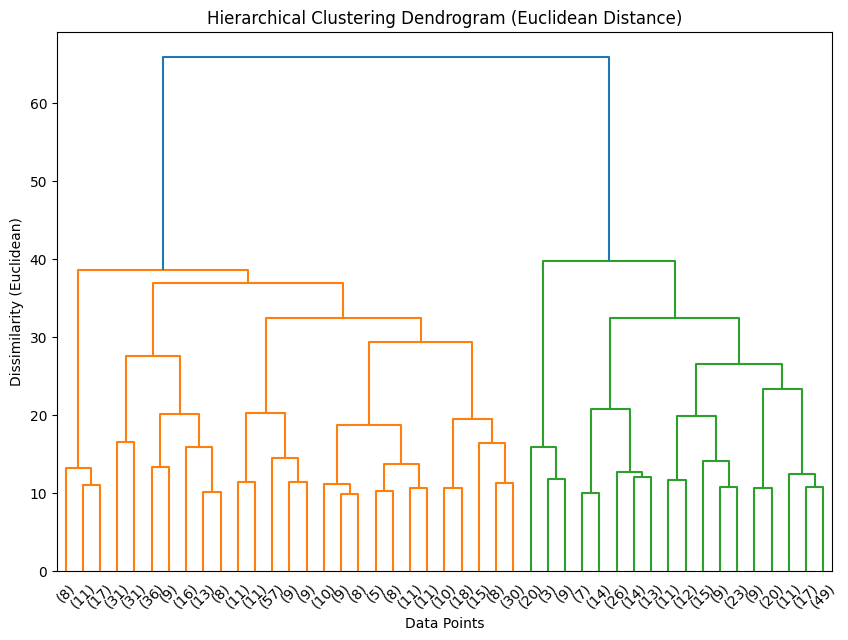

Optimal number of clusters (Euclidean): 3


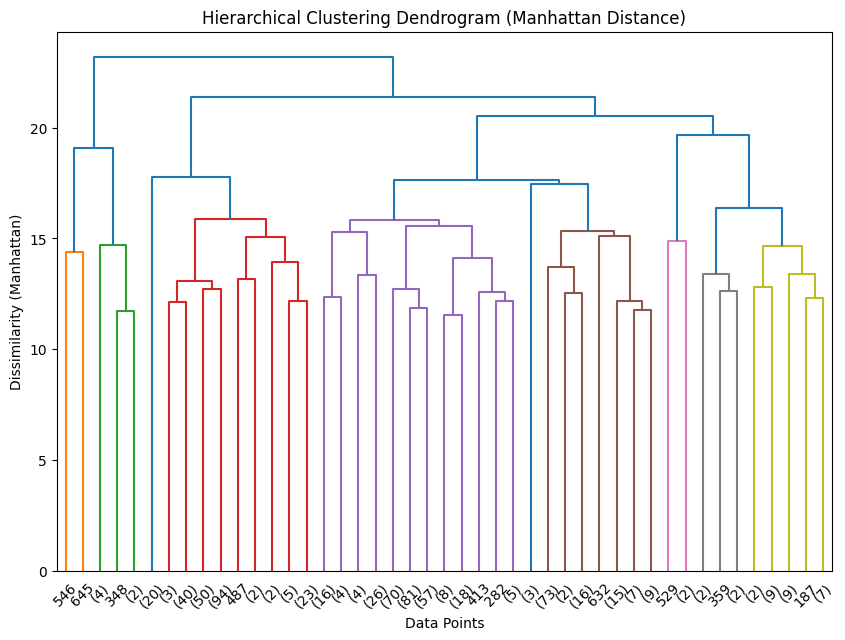

Optimal number of clusters (Manhattan): 3


In [249]:
# Euclidean Distance Dendrogram (using 'ward')
linked_euclidean = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linked_euclidean, truncate_mode='lastp', p=45, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Euclidean Distance)')
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity (Euclidean)')
plt.show()

# Determine optimal clusters for Euclidean
optimal_clusters_euclidean = fcluster(linked_euclidean, t=3, criterion='maxclust')
print(f"Optimal number of clusters (Euclidean): {len(set(optimal_clusters_euclidean))}")

# Manhattan Distance Dendrogram (using 'average' linkage method)
linked_manhattan = linkage(X_scaled, method='average', metric='cityblock')
plt.figure(figsize=(10, 7))
dendrogram(linked_manhattan, truncate_mode='lastp', p=45, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Manhattan Distance)')
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity (Manhattan)')
plt.show()

# Determine optimal clusters for Manhattan
optimal_clusters_manhattan = fcluster(linked_manhattan, t=3, criterion='maxclust')
print(f"Optimal number of clusters (Manhattan): {len(set(optimal_clusters_manhattan))}")


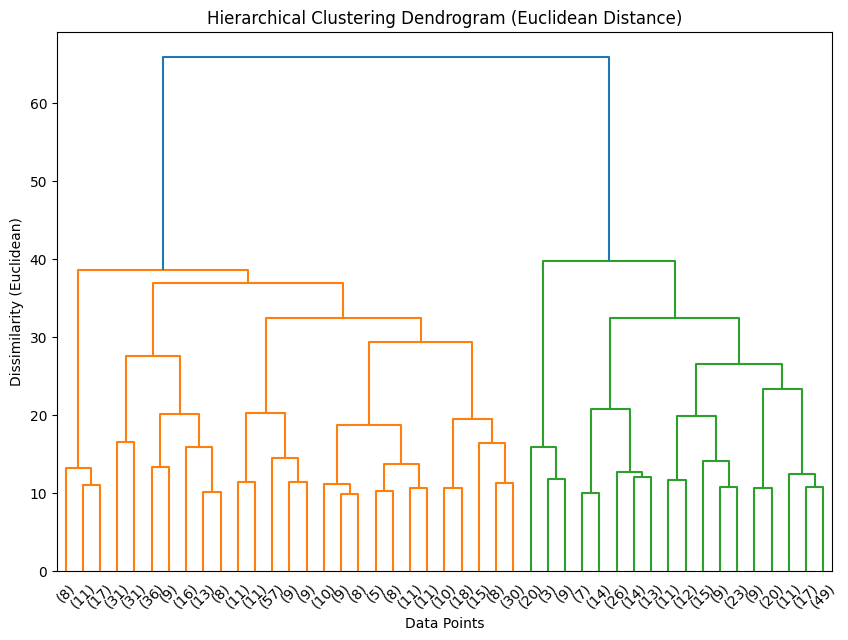

Optimal number of clusters (Euclidean): 3


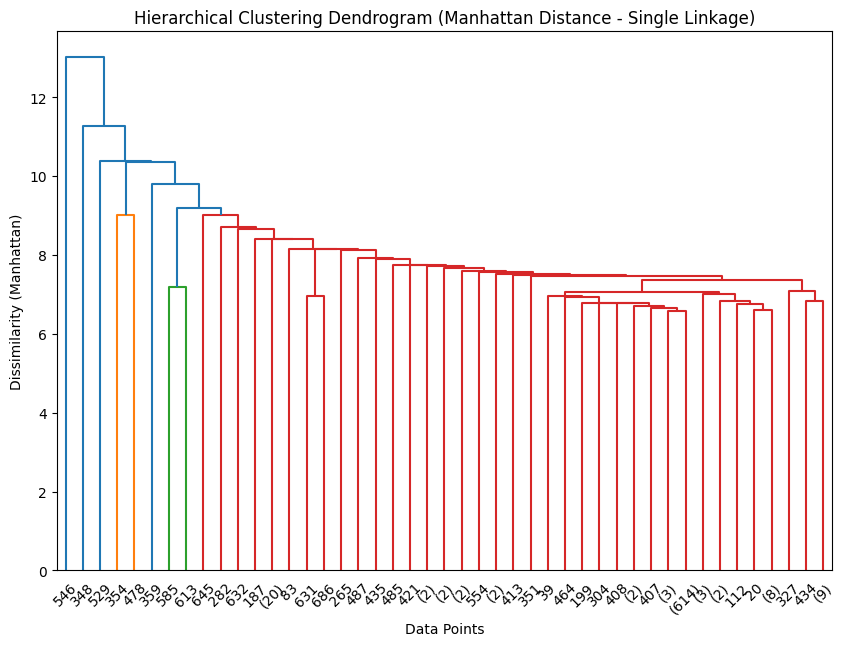

Optimal number of clusters (Manhattan - Single Linkage): 3


In [250]:
# Euclidean Distance Dendrogram (using 'ward')
linked_euclidean = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linked_euclidean, truncate_mode='lastp', p=45, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Euclidean Distance)')
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity (Euclidean)')
plt.show()

# Determine optimal clusters for Euclidean
optimal_clusters_euclidean = fcluster(linked_euclidean, t=3, criterion='maxclust')
print(f"Optimal number of clusters (Euclidean): {len(set(optimal_clusters_euclidean))}")

# Manhattan Distance Dendrogram (using 'single' linkage method)
linked_manhattan_single = linkage(X_scaled, method='single', metric='cityblock')
plt.figure(figsize=(10, 7))
dendrogram(linked_manhattan_single, truncate_mode='lastp', p=45, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Manhattan Distance - Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity (Manhattan)')
plt.show()

# Determine optimal clusters for Manhattan (Single Linkage)
optimal_clusters_manhattan_single = fcluster(linked_manhattan_single, t=3, criterion='maxclust')
print(f"Optimal number of clusters (Manhattan - Single Linkage): {len(set(optimal_clusters_manhattan_single))}")


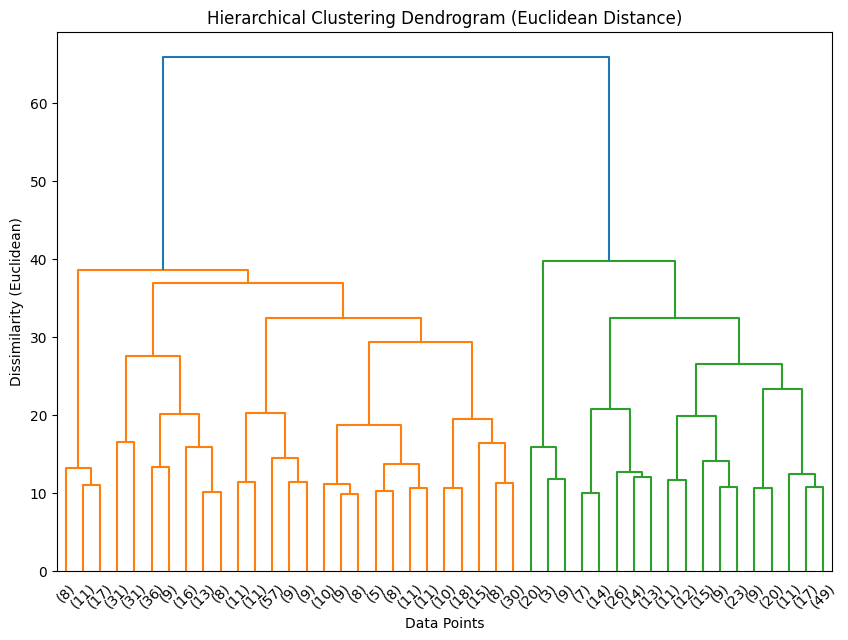

Optimal number of clusters (Euclidean): 3


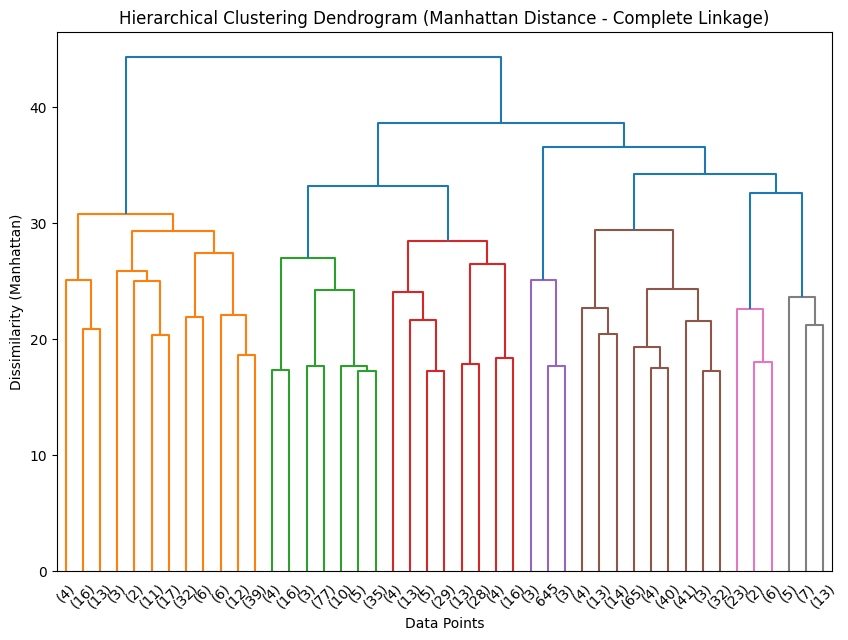

Optimal number of clusters (Manhattan - Complete Linkage): 3


In [251]:
# Euclidean Distance Dendrogram (using 'ward')
linked_euclidean = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linked_euclidean, truncate_mode='lastp', p=45, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Euclidean Distance)')
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity (Euclidean)')
plt.show()

# Determine optimal clusters for Euclidean
optimal_clusters_euclidean = fcluster(linked_euclidean, t=3, criterion='maxclust')
print(f"Optimal number of clusters (Euclidean): {len(set(optimal_clusters_euclidean))}")

# Manhattan Distance Dendrogram (using 'complete' linkage method)
linked_manhattan_complete = linkage(X_scaled, method='complete', metric='cityblock')
plt.figure(figsize=(10, 7))
dendrogram(linked_manhattan_complete, truncate_mode='lastp', p=45, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Manhattan Distance - Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity (Manhattan)')
plt.show()

# Determine optimal clusters for Manhattan (Complete Linkage)
optimal_clusters_manhattan_complete = fcluster(linked_manhattan_complete, t=3, criterion='maxclust')
print(f"Optimal number of clusters (Manhattan - Complete Linkage): {len(set(optimal_clusters_manhattan_complete))}")


kmeans to compare with our PCA 

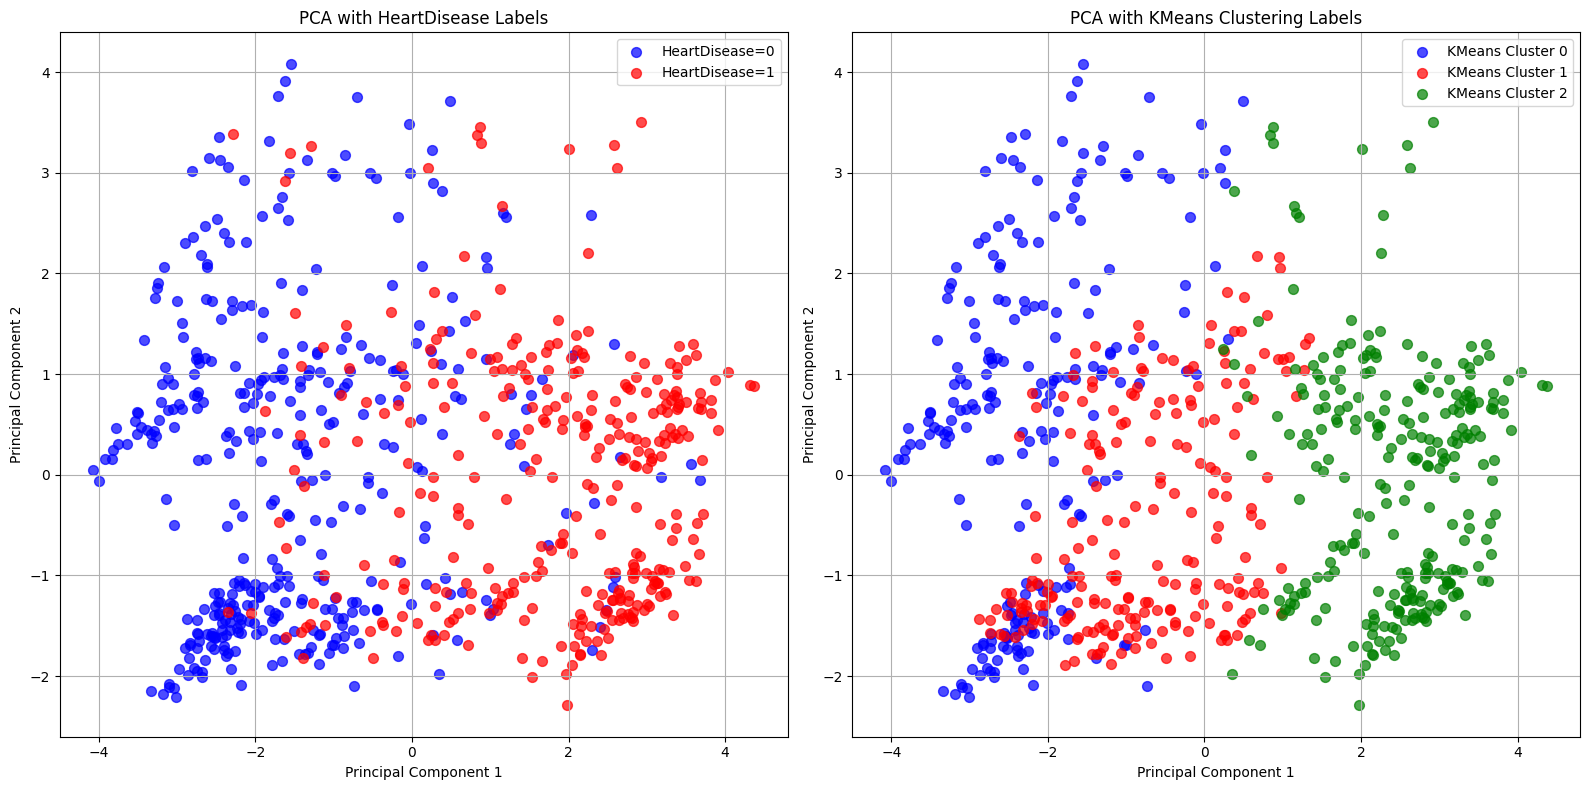

Adjusted Rand Index between HeartDisease labels and KMeans clusters: 0.33


In [253]:
# Perform KMeans clustering on scaled data
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters to match hierarchical clustering
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add KMeans clustering labels to the PCA DataFrame
pca_df['KMeans_Cluster'] = kmeans_labels

# Visualize PCA with HeartDisease and Clustering Labels
plt.figure(figsize=(16, 8))

# Subplot 1: PCA with HeartDisease labels
plt.subplot(1, 2, 1)
for label, color in zip([0, 1], ['blue', 'red']):
    subset = pca_df[pca_df['HeartDisease'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'HeartDisease={label}', alpha=0.7, s=50, c=color)
plt.title('PCA with HeartDisease Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Subplot 2: PCA with KMeans clustering labels
plt.subplot(1, 2, 2)
for cluster, color in zip(sorted(pca_df['KMeans_Cluster'].unique()), ['blue', 'red', 'green']):
    subset = pca_df[pca_df['KMeans_Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'KMeans Cluster {cluster}', alpha=0.7, s=50, c=color)
plt.title('PCA with KMeans Clustering Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Quantify alignment using Adjusted Rand Index
ari = adjusted_rand_score(y, kmeans_labels)
print(f"Adjusted Rand Index between HeartDisease labels and KMeans clusters: {ari:.2f}")


conclusion of dendrogram comparison with PCA 

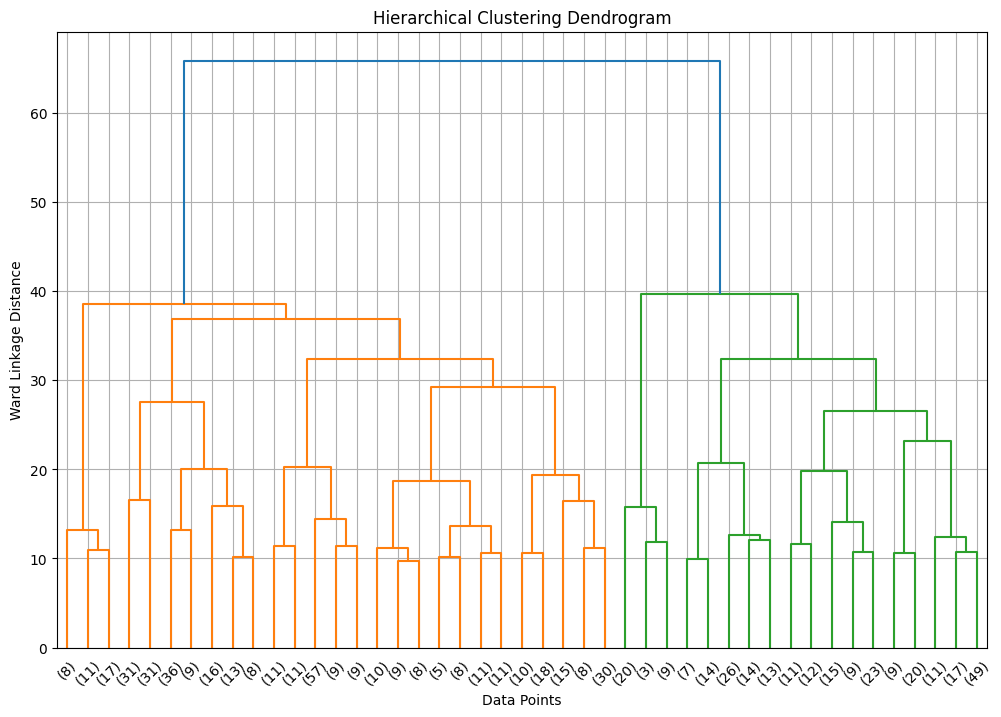

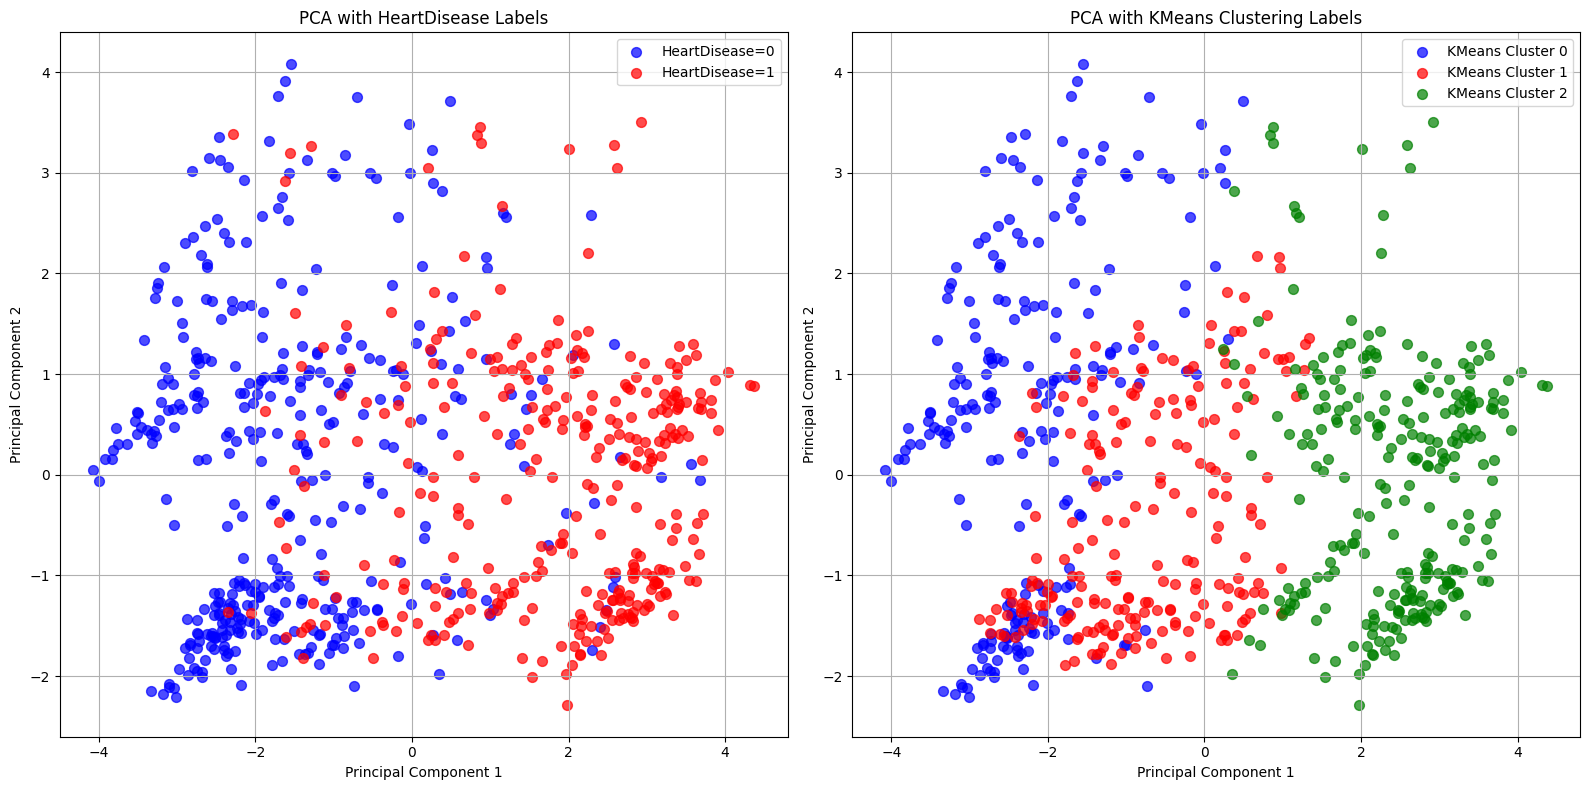

Adjusted Rand Index between HeartDisease labels and KMeans clusters: 0.33


In [255]:
linked = linkage(X_scaled, method='ward')
optimal_clusters_hierarchical = fcluster(linked, t=3, criterion='maxclust')

# Generate and save dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=45, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Ward Linkage Distance')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add clustering results to PCA DataFrame
pca_df['KMeans_Cluster'] = kmeans_labels

plt.figure(figsize=(16, 8))

# Subplot 1: PCA with HeartDisease labels
plt.subplot(1, 2, 1)
for label, color in zip([0, 1], ['blue', 'red']):
    subset = pca_df[pca_df['HeartDisease'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'HeartDisease={label}', alpha=0.7, s=50, c=color)
plt.title('PCA with HeartDisease Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
# Subplot 2: PCA with KMeans clustering labels
plt.subplot(1, 2, 2)
for cluster, color in zip(sorted(pca_df['KMeans_Cluster'].unique()), ['blue', 'red', 'green']):
    subset = pca_df[pca_df['KMeans_Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'KMeans Cluster {cluster}', alpha=0.7, s=50, c=color)
plt.title('PCA with KMeans Clustering Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute Adjusted Rand Index for comparison
ari = adjusted_rand_score(y, kmeans_labels)
print(f"Adjusted Rand Index between HeartDisease labels and KMeans clusters: {ari:.2f}")
